# **DATA CLEANING NOTEBOOK**

<br>

## Objectives

* Clean the data to prepare it for the ML models

## Inputs

* outputs/datasets/collection/house_prices_after_inspection.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Conclusions

* 

---

# Change working directory to the parent folder

Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues'

# Load the Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/house_prices_after_inspection.csv")
df.tail()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125
1459,1256,0.0,3.0,No,830,BLQ,136,0.0,276,Fin,...,75.0,0.0,68,6,5,1256,736.0,1965,1965,147500


In [5]:
df_to_clean = df.copy()
df_to_clean.tail()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125
1459,1256,0.0,3.0,No,830,BLQ,136,0.0,276,Fin,...,75.0,0.0,68,6,5,1256,736.0,1965,1965,147500


# Data Exploration

* In notebooks 1 and 2, EDA was also carried out, in this notebook, however it will be extended because we want to clean properly the data to prepare it for modelling.

#### Quick EDA

In [6]:
df_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_to_clean.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.00,1374.00,1361.00,1460.00,1460.00,136.00,1460.00,1379.00,1460.00,1460.00,1201.00,1452.00,1460.00,1460.00,1460.00,1460.00,155.00,1460.00,1460.00,1460.00
mean,1162.63,348.52,2.87,443.64,567.24,25.33,472.98,1978.51,1515.46,10516.83,70.05,103.69,46.66,5.58,6.10,1057.43,103.74,1971.27,1984.87,180921.20
std,386.59,438.87,0.82,456.10,441.87,66.68,213.80,24.69,525.48,9981.26,24.28,181.07,66.26,1.11,1.38,438.71,135.54,30.20,20.65,79442.50
min,334.00,0.00,0.00,0.00,0.00,0.00,0.00,1900.00,334.00,1300.00,21.00,0.00,0.00,1.00,1.00,0.00,0.00,1872.00,1950.00,34900.00
25%,882.00,0.00,2.00,0.00,223.00,0.00,334.50,1961.00,1129.50,7553.50,59.00,0.00,0.00,5.00,5.00,795.75,0.00,1954.00,1967.00,129975.00
50%,1087.00,0.00,3.00,383.50,477.50,0.00,480.00,1980.00,1464.00,9478.50,69.00,0.00,25.00,5.00,6.00,991.50,0.00,1973.00,1994.00,163000.00
75%,1391.25,728.00,3.00,712.25,808.00,0.00,576.00,2002.00,1776.75,11601.50,80.00,166.00,68.00,6.00,7.00,1298.25,182.50,2000.00,2004.00,214000.00
max,4692.00,2065.00,8.00,5644.00,2336.00,286.00,1418.00,2010.00,5642.00,215245.00,313.00,1600.00,547.00,9.00,10.00,6110.00,736.00,2010.00,2010.00,755000.00


#### Evaluate dropping variables
  * All variables are descriptive features that would be a available for a prospect property. Thus, at this point no variables are being dropped.

#### Check for duplicates (the code below indicates that there are no duplicated rows)

In [8]:
duplicate_rows_mask = df_to_clean.duplicated(keep=False)
only_duplicated_values_df = df_to_clean[duplicate_rows_mask]
print(only_duplicated_values_df)

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, BedroomAbvGr, BsmtExposure, BsmtFinSF1, BsmtFinType1, BsmtUnfSF, EnclosedPorch, GarageArea, GarageFinish, GarageYrBlt, GrLivArea, KitchenQual, LotArea, LotFrontage, MasVnrArea, OpenPorchSF, OverallCond, OverallQual, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, SalePrice]
Index: []

[0 rows x 24 columns]


#### Check for missing values

* Use the custom EvaluateMissingData function provided by Code Institute to understand further the Missing values in the data

In [9]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [10]:
EvaluateMissingData(df_to_clean)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


* Retrive the variables with missing data as a list

In [11]:
vars_with_missing_data = df_to_clean.columns[df_to_clean.isnull().any()].to_list()
vars_with_missing_data


['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

* Further explore these variables with a Profile Report

In [12]:
from ydata_profiling import ProfileReport
profile_report= ProfileReport(df=df_to_clean[vars_with_missing_data], minimal=True)
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA Observations

* All variables are descriptive features that would be a available for a 
  prospect property. Thus, at this point no variables are being dropped.
* 10 variables have missing values: 2ndFlrSF, BedroomAbvGr, BsmtExposure,
  BsmtFinType1, EnclosedPorch, GarageFinish, GarageYrBlt, LotFrontage, 
  MasVnrArea, and WoodDeckSF.
* The categorical variables are imbalanced.
* The categorical variables BsmtFinType1 and KitchenQual show inconsistent
  casing. Thus, for consistency apply a case transformation to all categorical
  variables.
* Most numerical variables seem to be not normally distributed. 

# Correlation and PPS Analysis

* Use and load the custom functions provided by Code Institute to further understand the correlations and predictive power of the variables

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()
        plt.close()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()
        plt.close()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

* Calculate Correlations and Power Predictive Score of the dataset 
  
  * Note, this analysis is a quick check of the correlations and PPS analysis
    without handing missing values yet

In [16]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module='ppscore'
)

df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_to_clean)


/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count  mean  std  min  25%  50%  75%  max
ppscore 552.00  0.06 0.10 0.00 0.00 0.00 0.06 0.70


* Based on the descriptive statistics of ppscore the heatmap treshold chosen is 0.05 and 0.1



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



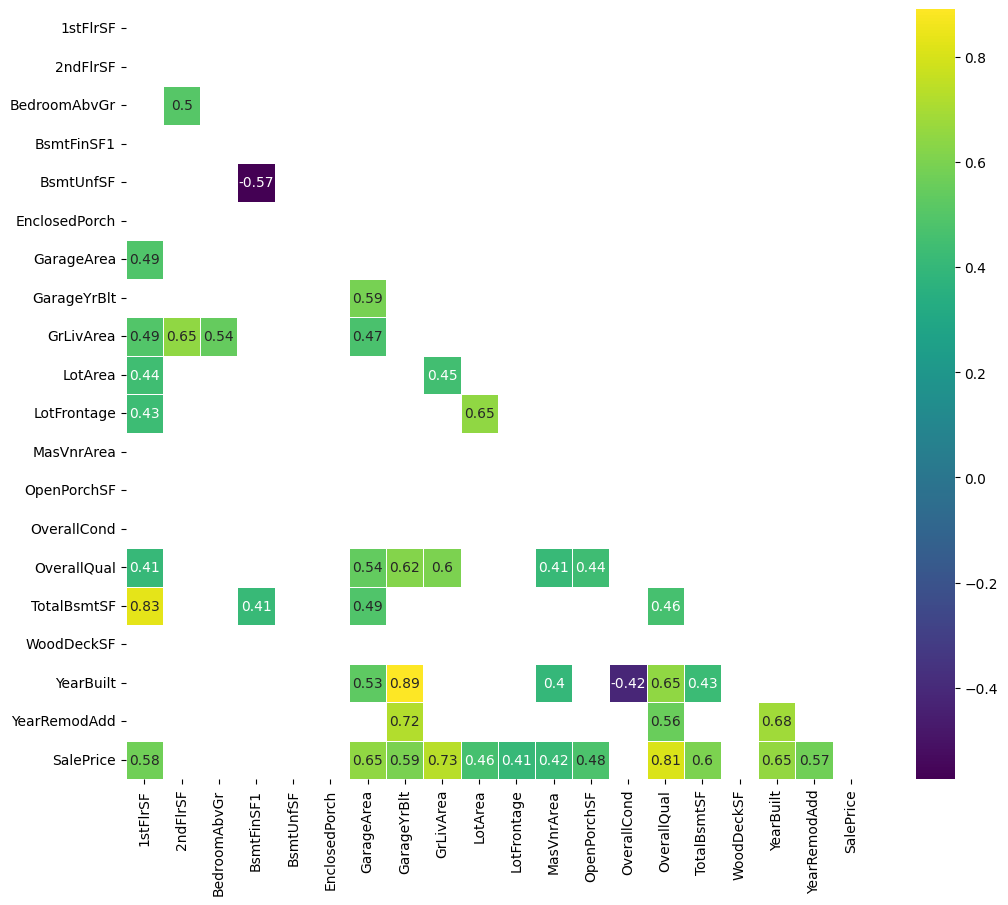



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



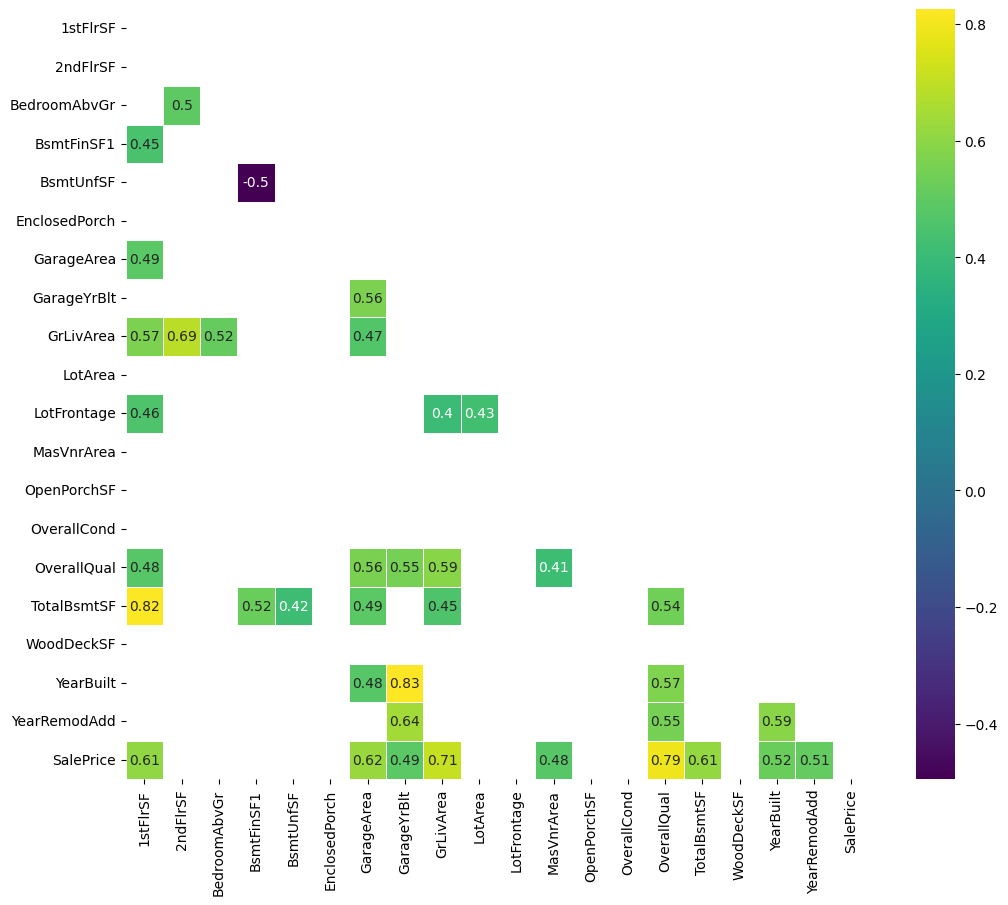



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



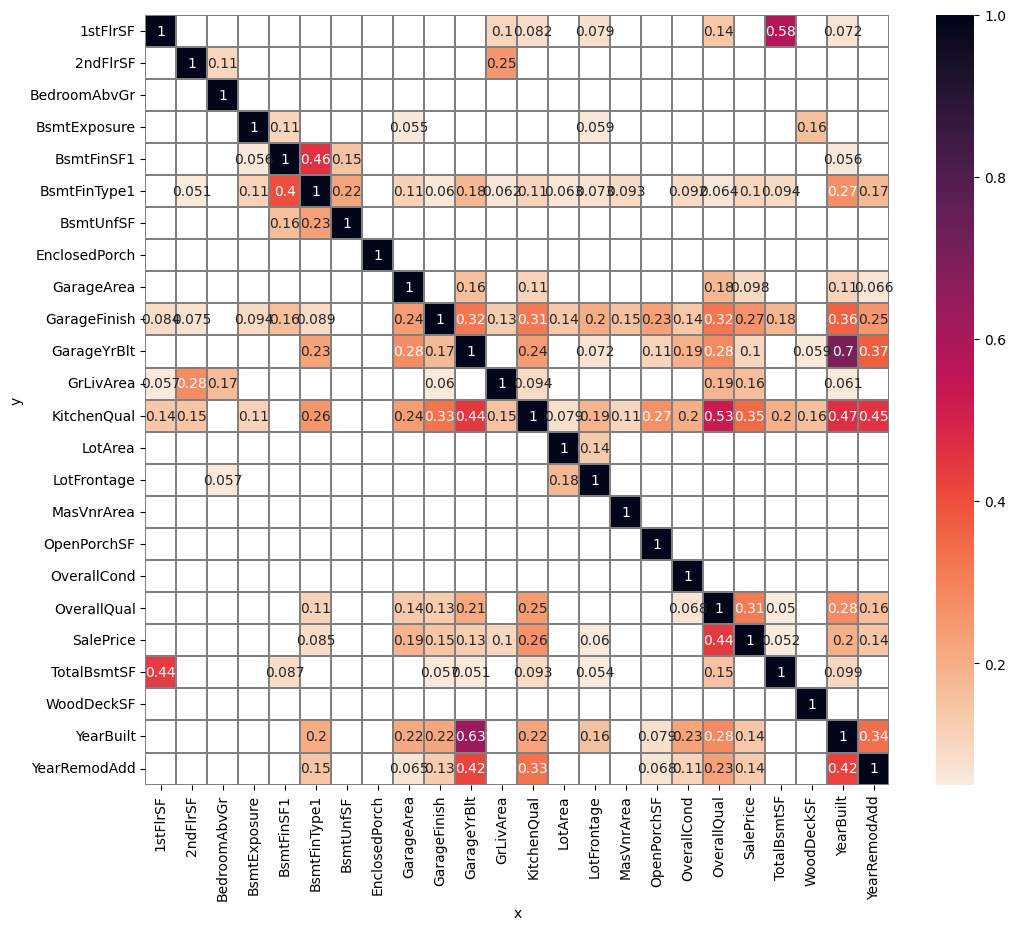

In [18]:
%matplotlib inline
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.05,
                  figsize=(12,10), font_annot=10)


## Correlation and PPS Observations

* All variables are descriptive features that would be a available for a 
  prospect property. Thus, at this point no variables are being dropped.
* 10 variables have missing values: 2ndFlrSF, BedroomAbvGr, BsmtExposure,
  BsmtFinType1, EnclosedPorch, GarageFinish, GarageYrBlt, LotFrontage, 
  MasVnrArea, and WoodDeckSF.
* The categorical variables are imbalanced.
* The categorical variables BsmtFinType1 and KitchenQual show inconsistent
  casing. Thus, for consistency apply a case transformation to all categorical
  variables.
* Most numerical variables seem to be not normally distributed. 

---

# Data Cleaning to prepare data for Modeling

* Handle missing data before performing correlation analysis

Step 1: Confirm the variables with missing values

In [15]:
df_house_price_study.isnull().sum().to_frame(name="Is Null")

NameError: name 'df_house_price_study' is not defined

Step 2: Categorical variables -> Handle their missing data

* Retrieve the categorical variables

In [ ]:
categorical_variables = df_house_price_study.select_dtypes(include='object').columns.to_list()
categorical_variables

* Assess the frequency of their values

In [ ]:
for col in categorical_variables:
    print(df_house_price_study[col].value_counts())

* Perform Categorical Imputation: Replace missing values for the categorical variables with the word "Missing"

In [ ]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer= CategoricalImputer(imputation_method='missing',
                                                  fill_value='Missing',
                                                  variables=categorical_variables)
df_categ_imputed =categorical_imputer.fit_transform(df_house_price_study)

* Confirm that the categorical variables do not have misssing values 

In [ ]:
df_categ_imputed[categorical_variables].isnull().sum().to_frame(name="Is Null")

* Assess the frequency of their values now including the "Missing" category

In [ ]:
for col in categorical_variables:
    print(df_categ_imputed[col].value_counts())

In [ ]:
profile_report_categ = ProfileReport(df=df_categ_imputed, minimal=True)
#profile_report_categ.to_notebook_iframe()

Step 3: Numerical variables -> Handle their missing data as well

* Check normality (based on the results below, the numerical variables are not normally distributed)

In [ ]:
import pingouin as pg
pg.normality(data=df_categ_imputed, alpha = 0.05)

In [ ]:
numerical_variables = df_categ_imputed.select_dtypes(include="number").columns
print(len(numerical_variables))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

def DistributionPlot(n_cols, numerical_variables, df):
    n_rows = (len(numerical_variables) + n_cols - 1) // n_cols

    # Create the figure and subplots grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

    # Flatten the axes array if there's more than one row/column
    axes = axes.flatten()

    # Iterate through columns and plot on respective axes
    for i, col in enumerate(numerical_variables):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i]) 
        axes[i].set_title(f'Distribution of {col}')

    # Remove unused subplots
    for j in range(len(numerical_variables), len(axes)):
        fig.delaxes(axes[j])

    # Prevent titles from overlapping
    plt.tight_layout()

    plt.show()


In [ ]:
DistributionPlot(n_cols =5, numerical_variables = numerical_variables,
                  df = df_categ_imputed)


* Retrieve the numerical variables as a list

In [ ]:
numerical_variables = df_categ_imputed.select_dtypes(include="number").columns.to_list()
numerical_variables

* Perform Median Imputation: Replace missing values for the numerical variables with the median value of the variable

In [ ]:
from feature_engine.imputation import MeanMedianImputer
numerical_imputer = MeanMedianImputer(imputation_method='median',
                            variables= numerical_variables)

df_categ_and_numb_imputed = numerical_imputer.fit_transform(df_categ_imputed)


* Confirm that all variables do not have misssing values 

In [ ]:
df_categ_and_numb_imputed.isnull().sum().to_frame(name="Is Null")

* Check once again their distribution (the numerical variables are still not normally distributed)

In [ ]:
DistributionPlot(n_cols =5, numerical_variables = numerical_variables,
                  df = df_categ_and_numb_imputed)

pg.normality(data=df_categ_and_numb_imputed, alpha = 0.05)

#### Summary of Handling Missing Values

* Both categorical and numerical variables have now no missing values.
* For the categorical variables, the proportion of missing values is not so high as to warrant dropping any of them. 
* Given that only a single categorical variable (BsmtExposure) presented a low degree of *missingness*, the strategy of imputing 'Missing' values with the most frequent category is at the moment not being considered.


<br>

# Correlation Study: Pearson and Spearman

**Goal:** identify how the target (SalesPrice) correlate to the variables, and retrieve the top 5 correlation variables for SalesPrice.

Step 1: Transform categorical variables to numerical variables using one hot encoding.

* This step is performed because Spearman and Peason methods need numeric variables.

In [ ]:
from feature_engine.encoding import OneHotEncoder
one_hot_encoder = OneHotEncoder(variables=df_categ_and_numb_imputed.select_dtypes(include='object').columns.to_list(), drop_last=False)
df_ohe = one_hot_encoder.fit_transform(df_categ_and_numb_imputed)
df_ohe.head()

Step 2: Evaluate if One Hot Encoding worked

* OHE worked because the code below shows that the dataset has no longer categorical variables

In [ ]:
categorical_variables = df_ohe.select_dtypes(include='object').columns.to_list()
categorical_variables

Step 3: Perform Pearson

* Retrieve the top 10 correlated variables/features against the target SalePrice.

In [ ]:
corr_pearson_top10 = df_ohe.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10).to_frame(name="Correlation Coefficient")
corr_pearson_top10

Step 3: Perform Spearman

* Retrieve the top 10 correlated variables/features against the target SalePrice.

In [ ]:
corr_spearman_top10 = df_ohe.corr(method='spearman', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10).to_frame(name="Correlation Coefficient")
corr_spearman_top10

Step 4: Get the top 5 combined features of Pearson and Spearman

In [ ]:
combined_top_features = set(corr_pearson_top10[:5].index.to_list() + corr_spearman_top10[:5].index.to_list())
combined_top_features

Therefore we will study if:

* The sale price tends to increase as the first floor square footage increases.
* The sale price tends to increase as the size of the garage increases.
* The sale price tends to increase as the above-grade living area increases.
* The sale price tends to increase as the overall house material and finish of the house improves.
* The sale price tends to increase as the total square feet of basement area increases.
* The sale price tends to increase with newer construction dates  

In [ ]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

#### Summary of Pearson and Spearman 

* For both methods we observe from moderate to very strong correlations between the Sale Price and a given variable to study.

<br>

# EDA on variables to study

Step 1: Create a dataframe with the variables to study and the target (SalePrice)

In [ ]:
df_eda_subset = df_house_price_study.filter(vars_to_study + ["SalePrice"])
df_eda_subset.head()

Step 2: Plot their variable distribution

* The target variable (SalePrice) is numeric.
* Thus, to visualize the distribution for categorical variables the choice is a boxplot and for numerical variables a scatter plot.

In [ ]:
sns.set_style('whitegrid')

# %matplotlib inline

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df, x=col, y=target_var)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()
    plt.close()

def plot_numerical_vs_continuous(df, col, target_var):
    plt.figure(figsize=(10, 6))

    sns.scatterplot(data=df, x=col, y=target_var, alpha=0.6)
    sns.regplot(data=df, x=col, y=target_var, scatter=False, color='red', line_kws={'linestyle':'--'}) # Adds a regression line
    plt.title(f'{col} vs. {target_var} (Scatter Plot with Regression Line)', fontsize=16)


    plt.xlabel(col, fontsize=12)
    plt.ylabel(target_var, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    plt.close()


print(df_eda_subset.head())
target_var = 'SalePrice'
for col in vars_to_study:
    if df_eda_subset[col].dtype == 'object':
        plot_categorical(df_eda_subset, col, target_var)
        print("\n\n")
    else:
        plot_numerical_vs_continuous(df_eda_subset, col, target_var)
        print("\n\n")

# Parallel Plot with numerical variables

* Get a parallel plot.
* As all variables are numerical, there is no need for transformation step(s).

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(df_eda_subset, color="SalePrice",
                              dimensions = vars_to_study,
                              color_continuous_scale = 'Jet')
fig.show()


<br>

# Conclusions

The correlations and plots interpretation converge.

* Sale prices are typically higher for homes with larger first-floor square footage.
* Sale prices are typically higher for homes with larger garages.
* Sale prices are typically higher for homes with larger above-grade living areas.
* Sale prices are typically higher when the overall quality of the house's materials and finish improves.
* Sale prices are typically higher for homes with larger total basement area.
* Sale prices are typically higher for homes that were recently constructed.   